<a href="https://colab.research.google.com/github/Vicente-Lorenzo/NetworkScience/blob/main/Project_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import networkx as nx               # graphs manipulation
import matplotlib.pyplot as plt     # visualization
import numpy as np                  # auxiliar functions
import random as rand               # Random
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
airlines_data = pd.read_csv('airlines.csv')
airlines_data = airlines_data.head(10000)
G = nx.Graph()
edges = [(row['src_iata'], row['dest_iata']) for _, row in airlines_data.iterrows()]
G.add_edges_from(edges)

In [47]:
airlines_data

,airline,airline_id,src_iata,src_id,dest_iata,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
9995,AF,137,TLS,1273,SVQ,1253,NaN,0,319
9996,AF,137,TLS,1273,SXB,1435,NaN,0,319 320
9997,AF,137,TLS,1273,VCE,1551,NaN,0,319 320
9998,AF,137,TLV,1590,CDG,1382,NaN,0,320


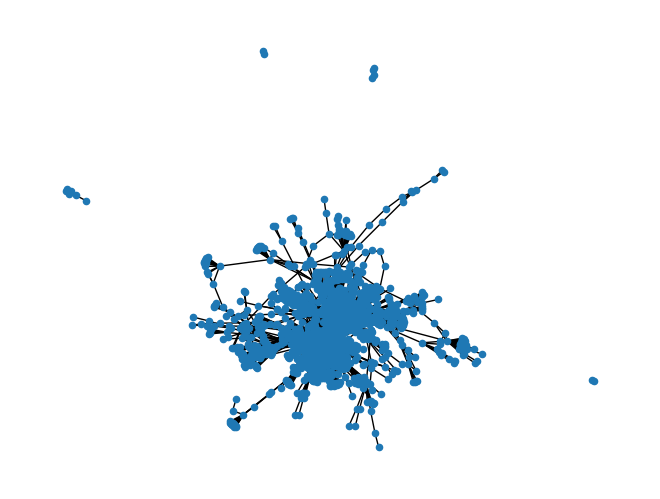

In [48]:
nx.draw(G,node_size=20)
plt.show()

In [13]:
# Assuming you have already created the graph 'G' using the provided code
# Assuming you have also read the 'airlines.csv' data into a DataFrame called 'airlines_data'

# Find connected components (subgraphs) in the graph
connected_components = list(nx.connected_components(G))

# Sort the connected components by size (number of nodes)
connected_components.sort(key=len, reverse=True)

# Get the largest connected component (main graph)
largest_component = connected_components[0]

# Get the nodes in the largest connected component
largest_component_nodes = set(largest_component)

# Find nodes in other connected components (subgroups)
subgroup_nodes = []
for component in connected_components[1:]:
    subgroup_nodes.extend(list(component))

print("Nodes in the largest connected component:")
print(largest_component_nodes)

print("\nNodes in the subgroups not connected to the main graph:")
print(subgroup_nodes)

Nodes in the largest connected component:
{'PFB', 'YTY', 'PIA', 'DGT', 'CLL', 'PAS', 'LSP', 'URC', 'SUF', 'HDG', 'SKU', 'EGC', 'WMO', 'PNQ', 'CGP', 'ROR', 'CAK', 'IMF', 'CGB', 'MII', 'IPN', 'YTE', 'YGP', 'POZ', 'PHC', 'KMG', 'RIX', 'SBH', 'PNZ', 'BUR', 'DBQ', 'MXZ', 'CUF', 'SGD', 'YAB', 'TAO', 'HSG', 'DFW', 'TVS', 'TIJ', 'SPS', 'HSL', 'ANU', 'NME', 'DRO', 'CGK', 'CFB', 'WNA', 'RJH', 'JBR', 'BIO', 'KNH', 'MYR', 'LYC', 'SGN', 'AIN', 'SMK', 'LRM', 'FOC', 'KKJ', 'XRY', 'RKD', 'JSY', 'INC', 'SAT', 'YCO', 'MFE', 'MHT', 'DVO', 'SPC', 'KTS', 'FUE', 'EFL', 'AET', 'BZE', 'BEL', 'ONT', 'DYG', 'PHL', 'YEK', 'MID', 'SNA', 'CLE', 'BIQ', 'WRO', 'RUT', 'PBD', 'MCX', 'GWT', 'FEN', 'LGA', 'GGT', 'DEN', 'JED', 'PTU', 'SKD', 'YBG', 'TCB', 'MBJ', 'BET', 'ELI', 'VXO', 'YYT', 'DKR', 'CME', 'PEZ', 'YSG', 'ALO', 'FLL', 'ROC', 'SDU', 'MTY', 'YGZ', 'SMI', 'SVG', 'RAJ', 'DIY', 'LYA', 'AVL', 'PNH', 'PLU', 'PVH', 'HAM', 'TUR', 'LIT', 'HUU', 'CHO', 'AMD', 'PMI', 'MAO', 'AGP', 'PET', 'STM', 'WAW', 'CCC', 'CEN', 'BUF'

In [14]:
G.remove_nodes_from(subgroup_nodes)

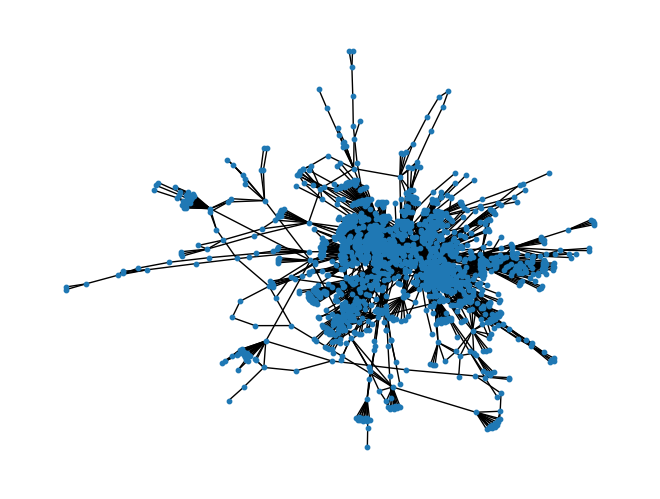

In [51]:
nx.draw(G,node_size=10)
plt.show()

In [8]:
# get the degree for each node
nx.degree(G)

DegreeView({'AER': 3, 'KZN': 8, 'ASF': 4, 'MRV': 3, 'CEK': 2, 'OVB': 10, 'DME': 44, 'NBC': 4, 'TGK': 1, 'UUA': 3, 'EGO': 5, 'KGD': 2, 'GYD': 2, 'LED': 25, 'SVX': 15, 'NJC': 2, 'NUX': 4, 'BTK': 2, 'IKT': 9, 'HTA': 1, 'KCK': 1, 'ODO': 1, 'UKX': 1, 'ULK': 2, 'YKS': 4, 'MJZ': 6, 'AYP': 1, 'LIM': 13, 'CUZ': 2, 'PEM': 1, 'HUU': 1, 'IQT': 2, 'PCL': 3, 'TPP': 3, 'ABJ': 6, 'BOY': 2, 'OUA': 10, 'ACC': 6, 'BKO': 4, 'DKR': 12, 'COO': 5, 'LFW': 3, 'NIM': 2, 'BOG': 26, 'GYE': 7, 'UIO': 5, 'CLO': 5, 'SCY': 1, 'OCC': 1, 'BDS': 3, 'ZRH': 42, 'BOD': 12, 'BRS': 1, 'GVA': 11, 'LPA': 13, 'LCA': 8, 'RMF': 2, 'TFS': 15, 'AJR': 1, 'LYC': 2, 'ARN': 22, 'GEV': 2, 'HAD': 3, 'JKG': 2, 'KRF': 2, 'KSD': 1, 'MHQ': 2, 'OER': 1, 'POR': 2, 'TRF': 1, 'VBY': 1, 'VHM': 2, 'VXO': 3, 'HMV': 1, 'KOK': 1, 'TKU': 1, 'OSL': 7, 'ADQ': 8, 'AOS': 2, 'KKB': 2, 'KLN': 2, 'KOZ': 2, 'OLH': 1, 'KZB': 1, 'SYB': 2, 'KYK': 1, 'ORI': 2, 'KPR': 1, 'BSO': 1, 'MNL': 55, 'BXU': 2, 'CBO': 1, 'CGY': 5, 'CRM': 1, 'DGT': 2, 'DWC': 1, 'GES': 3, 'KL

In [9]:
# graph degree frequency
nx.degree_histogram(G)

[0,
 465,
 364,
 193,
 117,
 66,
 53,
 38,
 38,
 19,
 27,
 19,
 18,
 16,
 9,
 13,
 12,
 2,
 7,
 8,
 9,
 3,
 5,
 4,
 0,
 4,
 4,
 2,
 2,
 3,
 3,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

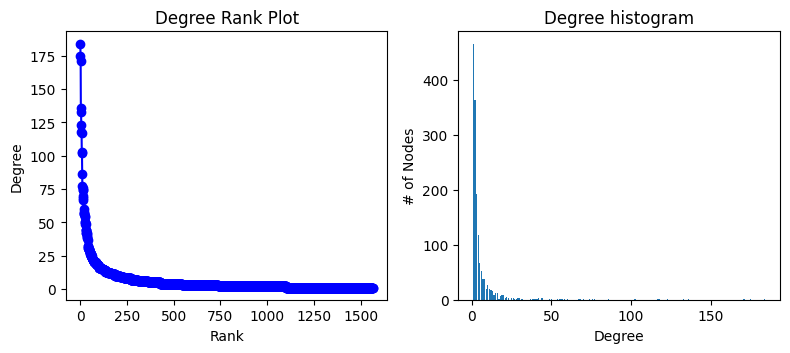

In [11]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)



ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

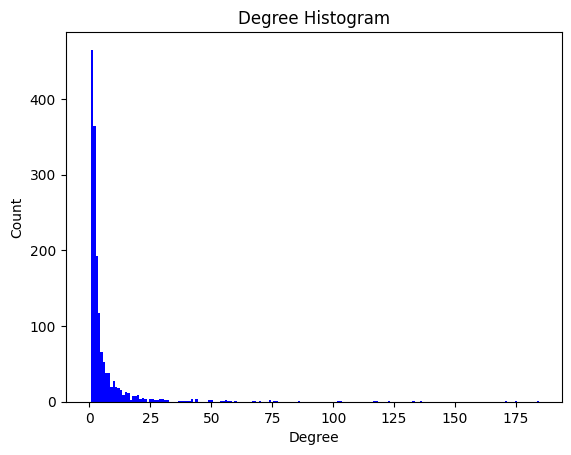

In [12]:
# Plot the degree histogram as a bar plot
degree_hist = nx.degree_histogram(G)
plt.bar(range(len(degree_hist)), degree_hist, width=1.0, color='b')

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Histogram')

# Show the plot
plt.show()


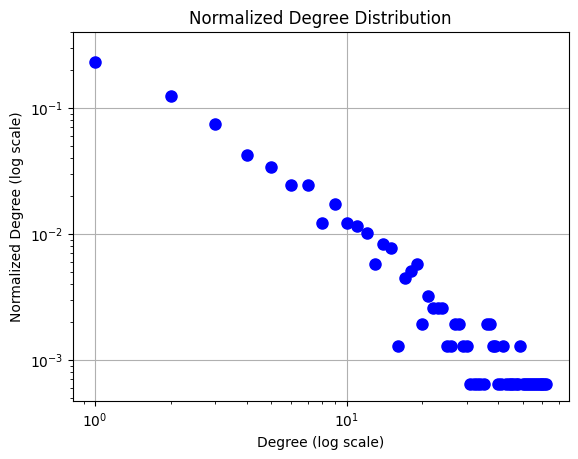

In [14]:
# Normalize the degree values
total_nodes = len(G.nodes())
normalized_degrees = [count / total_nodes for count in degree_hist]

# Remove zero-degree entries (which will cause issues in log-log plotting)
degrees = list(range(len(normalized_degrees)))
normalized_degrees = [deg for deg in normalized_degrees if deg > 0]
degrees = degrees[:len(normalized_degrees)]

# Plot the normalized degree distribution in log-log scale
plt.figure()
plt.loglog(degrees, normalized_degrees, 'o', color='b', markersize=8)
plt.xlabel('Degree (log scale)')
plt.ylabel('Normalized Degree (log scale)')
plt.title('Normalized Degree Distribution')
plt.grid(True)
plt.show()

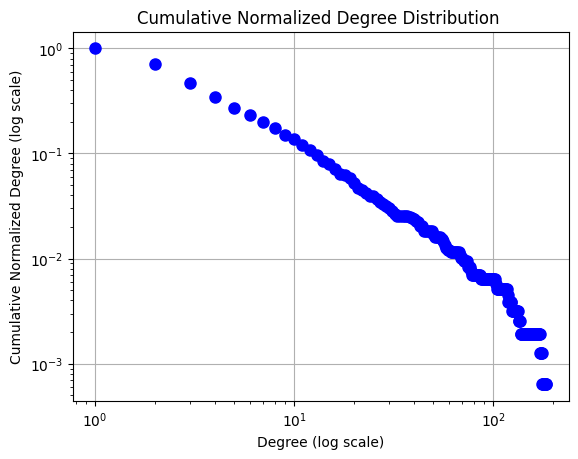

In [15]:
# Calculate the degree histogram
degree_hist = nx.degree_histogram(G)

# Normalize the degree values
total_nodes = len(G.nodes())
normalized_degrees = [count / total_nodes for count in degree_hist]

# Remove zero-degree entries (which will cause issues in log-log plotting)
degrees = list(range(len(normalized_degrees)))
normalized_degrees = [sum(normalized_degrees[i:]) for i in range(len(normalized_degrees))]

# Plot the cumulative degree distribution in log-log scale
plt.figure()
plt.loglog(degrees, normalized_degrees, 'o', color='b', markersize=8)
plt.xlabel('Degree (log scale)')
plt.ylabel('Cumulative Normalized Degree (log scale)')
plt.title('Cumulative Normalized Degree Distribution ')
plt.grid(True)
plt.show()

In [16]:
# Graph density
nx.density(G)

0.0038387528209943103

In [17]:
# number of nodes and edges
nx.number_of_nodes(G), nx.number_of_edges(G)

(1567, 4710)

In [18]:
# compute and display the adjacency matrix
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# generate adjacency list (for graph G)
for line in nx.generate_adjlist(G):
  print(line)

AER KZN DYU KIV
KZN ASF CEK DME EGO LED SVX AYT
ASF MRV DME LED
MRV RTW SAW
CEK OVB
OVB SVX BTK IKT MJZ KRR LED PYJ DYU LBD
DME NBC TGK UUA BHK EGO FEG KSQ NMA NVI SKD TIV KRR LED MJZ PYJ RTW DYU LBD AKX CSY ESL GRV IJK MCX PES PEZ SKX ULV VKT VOZ KIV ATH CFU HER KGS RHO SKG BUS DUS FRA MUC TXL
NBC GYD LED SVX
TGK
UUA LED NJC
EGO KGD KUF ROV
KGD TXL
GYD CDG
LED ARH MMK SCW DYU LBD CSY IAR KVX MCX SKX VOG VOZ KIV ATH HER RHO SKG TXL CDG
SVX NJC NUX OVS RTW DYU KRO KUF MQF SCW UFA ULV URJ
NJC
NUX TJM UFA VKO
BTK IKT
IKT HTA KCK ODO UKX ULK YKS MJZ
HTA
KCK
ODO
UKX
ULK YKS
YKS MJZ PYJ
MJZ KJA PYJ
AYP LIM
LIM CUZ HUU PCL TPP AQP DFW JFK LAX MIA SCL YYZ CDG
CUZ PEM
PEM
HUU
IQT PCL TPP
PCL TPP
TPP
ABJ BOY OUA BKO BRU COO CDG
BOY OUA
OUA ACC BKO COO DKR LFW NIM BRU CDG
ACC DKR LOS ROB KMS LHR
BKO DKR CDG
DKR BJL DLA FNA LOS OXB LPA BRU CKY CDG
COO LFW BRU CDG
LFW CDG
NIM CDG
BOG GYE UIO MEX APO AUC BUN CZU EOH FLA IPI MVP PCR PDA PSO PUU RVE SJE SVI TME UIB VGZ VVC DFW MIA YYZ CDG
GYE CLO SCY 

In [20]:
nx.diameter(G)

15

In [21]:
nx.average_shortest_path_length(G)

4.3493216165795

In [22]:
nx.average_clustering(G)

0.4116871743220176

# Node analysis

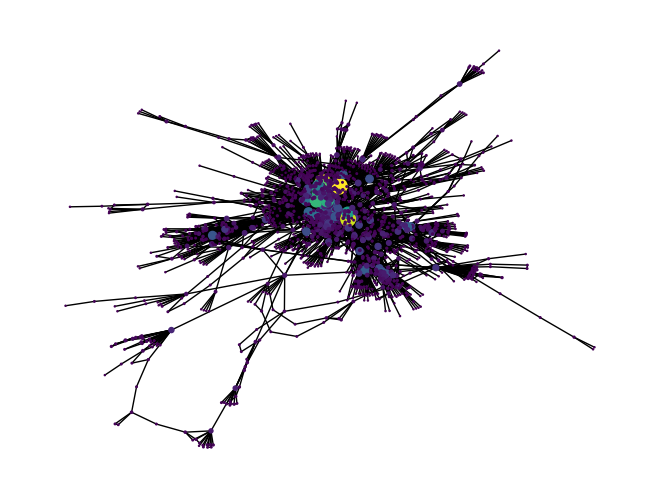

In [23]:
# compute graph degree centrality
centrality = nx.degree_centrality(G)
centrality = np.fromiter(centrality.values(), float)

# draw graph with node's color and size based on degree centrality
nx.draw(G, node_color=centrality, node_size=centrality*1e3, width = 1)

In [24]:
# Compute degree centrality for each node
centrality = nx.degree_centrality(G)

# Convert centrality values to a NumPy array
centrality_values = np.fromiter(centrality.values(), float)

# Get the indices of the top 10 nodes with highest centrality
top_10_node_indices = centrality_values.argsort()[-10:][::-1]

# Print the top 10 nodes and their centrality values
for idx in top_10_node_indices:
    node = list(centrality.keys())[idx]
    print(f"Node {node}: Centrality {centrality[node]}")

Node DFW: Centrality 0.11749680715197958
Node ATL: Centrality 0.11174968071519796
Node CDG: Centrality 0.10919540229885058
Node CLT: Centrality 0.08684546615581099
Node ORD: Centrality 0.08492975734355045
Node MIA: Centrality 0.078544061302682
Node PHL: Centrality 0.07535121328224777
Node YYZ: Centrality 0.07471264367816093
Node DUS: Centrality 0.06577266922094509
Node LHR: Centrality 0.06513409961685825


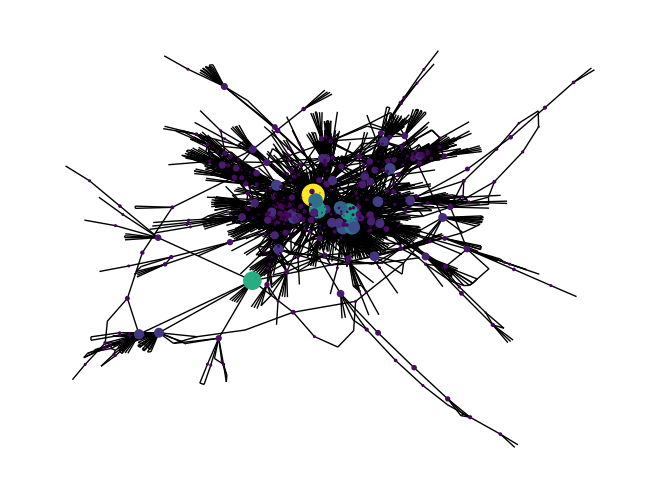

In [25]:
# compute graph betweenness centrality
centrality = nx.betweenness_centrality(G)
centrality = np.fromiter(centrality.values(), float)

# draw graph with node's color and size based on betweenness centrality
nx.draw(G, node_color=centrality, node_size=centrality*1e3)

In [26]:
# Compute betweenness centrality for each node
centrality = nx.betweenness_centrality(G)

# Convert centrality values to a NumPy array
centrality_values = np.fromiter(centrality.values(), float)

# Get the indices of the top 10 nodes with highest betweenness centrality
top_10_node_indices = centrality_values.argsort()[-10:][::-1]

# Print the top 10 nodes and their betweenness centrality values
for idx in top_10_node_indices:
    node = list(centrality.keys())[idx]
    print(f"Node {node}: Betweenness Centrality {centrality[node]}")

Node CDG: Betweenness Centrality 0.24666896335758676
Node ANC: Betweenness Centrality 0.15276869907254398
Node LAX: Betweenness Centrality 0.13357513628609358
Node MIA: Betweenness Centrality 0.13080163775649425
Node DFW: Betweenness Centrality 0.10140348238539103
Node LHR: Betweenness Centrality 0.0892303381740975
Node YYZ: Betweenness Centrality 0.07774744063942764
Node ATL: Betweenness Centrality 0.06368620571237656
Node PHX: Betweenness Centrality 0.05936607927038781
Node ORD: Betweenness Centrality 0.05553496365852455


# Robustness

In [17]:
airlines_data = pd.read_csv('airlines.csv')
airlines_data = airlines_data.head(10000)
G = nx.Graph()
edges = [(row['src_iata'], row['dest_iata']) for _, row in airlines_data.iterrows()]
G.add_edges_from(edges)

In [18]:
# Assuming you have already created the graph 'G' using the provided code
# Assuming you have also read the 'airlines.csv' data into a DataFrame called 'airlines_data'

# Find connected components (subgraphs) in the graph
connected_components = list(nx.connected_components(G))

# Sort the connected components by size (number of nodes)
connected_components.sort(key=len, reverse=True)

# Get the largest connected component (main graph)
largest_component = connected_components[0]

# Get the nodes in the largest connected component
largest_component_nodes = set(largest_component)

# Find nodes in other connected components (subgroups)
subgroup_nodes = []
for component in connected_components[1:]:
    subgroup_nodes.extend(list(component))

print("Nodes in the largest connected component:")
print(largest_component_nodes)

print("\nNodes in the subgroups not connected to the main graph:")
print(subgroup_nodes)

Nodes in the largest connected component:
{'PFB', 'YTY', 'PIA', 'DGT', 'CLL', 'PAS', 'LSP', 'URC', 'SUF', 'HDG', 'SKU', 'EGC', 'WMO', 'PNQ', 'CGP', 'ROR', 'CAK', 'IMF', 'CGB', 'MII', 'IPN', 'YTE', 'YGP', 'POZ', 'PHC', 'KMG', 'RIX', 'SBH', 'PNZ', 'BUR', 'DBQ', 'MXZ', 'CUF', 'SGD', 'YAB', 'TAO', 'HSG', 'DFW', 'TVS', 'TIJ', 'SPS', 'HSL', 'ANU', 'NME', 'DRO', 'CGK', 'CFB', 'WNA', 'RJH', 'JBR', 'BIO', 'KNH', 'MYR', 'LYC', 'SGN', 'AIN', 'SMK', 'LRM', 'FOC', 'KKJ', 'XRY', 'RKD', 'JSY', 'INC', 'SAT', 'YCO', 'MFE', 'MHT', 'DVO', 'SPC', 'KTS', 'FUE', 'EFL', 'AET', 'BZE', 'BEL', 'ONT', 'DYG', 'PHL', 'YEK', 'MID', 'SNA', 'CLE', 'BIQ', 'WRO', 'RUT', 'PBD', 'MCX', 'GWT', 'FEN', 'LGA', 'GGT', 'DEN', 'JED', 'PTU', 'SKD', 'YBG', 'TCB', 'MBJ', 'BET', 'ELI', 'VXO', 'YYT', 'DKR', 'CME', 'PEZ', 'YSG', 'ALO', 'FLL', 'ROC', 'SDU', 'MTY', 'YGZ', 'SMI', 'SVG', 'RAJ', 'DIY', 'LYA', 'AVL', 'PNH', 'PLU', 'PVH', 'HAM', 'TUR', 'LIT', 'HUU', 'CHO', 'AMD', 'PMI', 'MAO', 'AGP', 'PET', 'STM', 'WAW', 'CCC', 'CEN', 'BUF'

In [19]:
G.remove_nodes_from(subgroup_nodes)

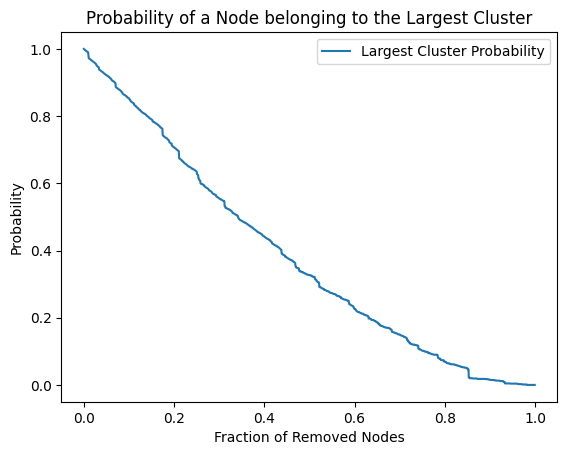

In [20]:
def calculate_largest_cluster_probability(graph):
    total_nodes = len(graph.nodes)
    largest_cluster_sizes = []
    largest_cluster_probability = []

    for i in range(total_nodes):
        # Calculate the size of the largest cluster
        largest_cluster = max(nx.connected_components(graph), key=len)
        largest_cluster_sizes.append(len(largest_cluster))

        # Remove a randomly selected node
        node_to_remove = np.random.choice(graph.nodes)
        graph.remove_node(node_to_remove)

    # Calculate the probability that a randomly selected node belongs to the largest cluster
    for size in largest_cluster_sizes:
        probability = 0.0 if size == 1 else size / total_nodes
        largest_cluster_probability.append(probability)

    # Calculate the fraction of removed nodes
    fraction_removed_nodes = np.arange(0, 1, 1/total_nodes)

    return fraction_removed_nodes, largest_cluster_probability


# Calculate the largest cluster probability and fraction of removed nodes
fraction_removed_nodes, largest_cluster_probability = calculate_largest_cluster_probability(G)

# Plot the results
plt.plot(fraction_removed_nodes, largest_cluster_probability, label='Largest Cluster Probability')
plt.xlabel('Fraction of Removed Nodes')
plt.ylabel('Probability')
plt.title('Probability of a Node belonging to the Largest Cluster')
plt.legend()
plt.show()



In [ ]:
airlines_data = pd.read_csv('airlines.csv')
airlines_data = airlines_data.head(10000)
G = nx.Graph()
edges = [(row['src_iata'], row['dest_iata']) for _, row in airlines_data.iterrows()]
G.add_edges_from(edges)

In [ ]:
# Assuming you have already created the graph 'G' using the provided code
# Assuming you have also read the 'airlines.csv' data into a DataFrame called 'airlines_data'

# Find connected components (subgraphs) in the graph
connected_components = list(nx.connected_components(G))

# Sort the connected components by size (number of nodes)
connected_components.sort(key=len, reverse=True)

# Get the largest connected component (main graph)
largest_component = connected_components[0]

# Get the nodes in the largest connected component
largest_component_nodes = set(largest_component)

# Find nodes in other connected components (subgroups)
subgroup_nodes = []
for component in connected_components[1:]:
    subgroup_nodes.extend(list(component))

print("Nodes in the largest connected component:")
print(largest_component_nodes)

print("\nNodes in the subgroups not connected to the main graph:")
print(subgroup_nodes)

In [ ]:
G.remove_nodes_from(subgroup_nodes)

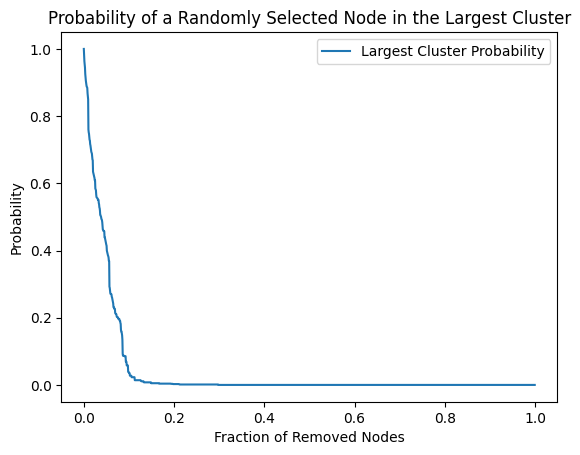

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def calculate_largest_cluster_probability(graph):
    total_nodes = len(graph.nodes)
    largest_cluster_sizes = []
    largest_cluster_probability = []

    for i in range(total_nodes):
        # Calculate the size of the largest cluster
        largest_cluster = max(nx.connected_components(graph), key=len)
        largest_cluster_sizes.append(len(largest_cluster))

        # Find the node with the highest degree and remove it
        node_to_remove = max(graph.degree, key=lambda x: x[1])[0]
        graph.remove_node(node_to_remove)

    # Calculate the probability that a randomly selected node belongs to the largest cluster
    for size in largest_cluster_sizes:
        probability = 0.0 if size == 1 else size / total_nodes
        largest_cluster_probability.append(probability)

    # Calculate the fraction of removed nodes
    fraction_removed_nodes = np.arange(0, 1, 1/total_nodes)

    return fraction_removed_nodes, largest_cluster_probability

# Assume G is your graph (you need to define G before calling the function)
# Calculate the largest cluster probability and fraction of removed nodes
fraction_removed_nodes, largest_cluster_probability = calculate_largest_cluster_probability(G)

# Plot the results
plt.plot(fraction_removed_nodes, largest_cluster_probability, label='Largest Cluster Probability')
plt.xlabel('Fraction of Removed Nodes')
plt.ylabel('Probability')
plt.title('Probability of a Randomly Selected Node in the Largest Cluster')
plt.legend()
plt.show()

